In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
import pandas as pd
import numpy as np

In [4]:
\cancer ='BLCA'

In [5]:
A=pd.read_csv('/home/wbjeong/cancer/JJM/results/SNN/BLCA/summary.csv')
B=pd.read_csv('/home/wbjeong/cancer/JJM/results/WSI/BLCA/summary.csv')
C=pd.read_csv('/home/wbjeong/cancer/JJM/results/MMF/BLCA/summary.csv')

In [33]:

my_pal = {"SNN":'green','AMIL':'orange','MMF':'purple'}

In [15]:
df=np.transpose(pd.DataFrame([A.iloc[:,-1],B.iloc[:,-1],B.iloc[:,-1]]))
df.columns=['SNN','AMIL','MMF']

In [28]:
df=pd.DataFrame(pd.concat([A.iloc[:,-1],B.iloc[:,-1],B.iloc[:,-1]]))
df.columns=['Concordance Index']
a_list=['SNN']*5+['AMIL']*5+['MMF']*5

In [29]:
df['method']=a_list

In [35]:
df

,Concordance Index,method
0,0.545516,SNN
1,0.578062,SNN
2,0.616065,SNN
3,0.592763,SNN
4,0.582985,SNN
0,0.583951,AMIL
1,0.513459,AMIL
2,0.546630,AMIL
3,0.508553,AMIL
4,0.608787,AMIL


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


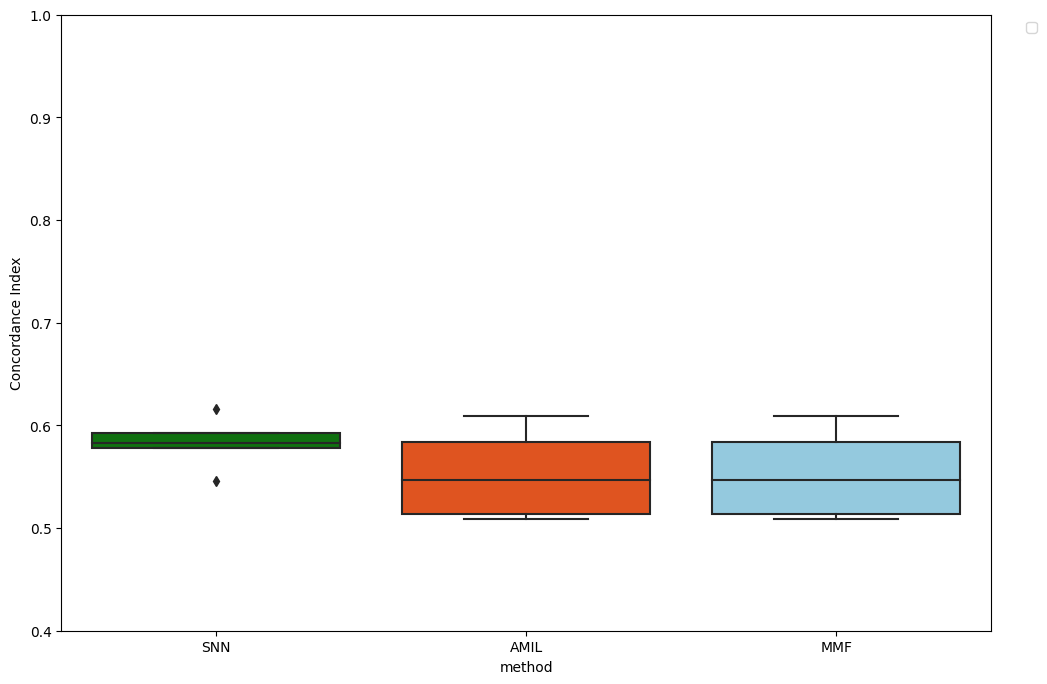

In [40]:
plt.figure(figsize=(12,8))
my_pal = {"SNN":'green','AMIL':'orangered','MMF':'skyblue'}
ax = sns.boxplot(y='Concordance Index',x='method',data=df,showfliers=True,palette=my_pal)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.ylim(0.4,1.0)
plt.savefig('/home/wbjeong/cancer/JJM/figures/BLCA/boxplot.pdf',bbox_inches="tight")

In [ ]:
plt.figure(figsize=(12,8))

hue_order=['kmeans_ARI','hierarchical_ARI']
box_pairs=[
    #(("NMF", "kmeans_ARI"), ("PCA", "kmeans_ARI")),
    #(("NMF", "kmeans_ARI"), ("noisyR", "kmeans_ARI")),
    (("NMF", "kmeans_ARI"), ("full_genes", "kmeans_ARI")),
    #(("PCA", "kmeans_ARI"), ("noisyR", "kmeans_ARI")),
    (("PCA", "kmeans_ARI"), ("full_genes", "kmeans_ARI")),
    #(("noisyR", "kmeans_ARI"), ("full_genes", "kmeans_ARI")),
    #(("NMF", "hierarchical_ARI"), ("PCA", "hierarchical_ARI")),
    #(("NMF", "hierarchical_ARI"), ("noisyR", "hierarchical_ARI")),
    (("NMF", "hierarchical_ARI"), ("full_genes", "hierarchical_ARI")),
    #(("PCA", "hierarchical_ARI"), ("noisyR", "hierarchical_ARI")),
    (("PCA", "hierarchical_ARI"), ("full_genes", "hierarchical_ARI")),
    (("noisyR", "hierarchical_ARI"), ("full_genes", "hierarchical_ARI")),
    
    ]
ax = sns.boxplot(y='ARI',x='method',hue='score',data=ARI,showfliers=False)
add_stat_annotation(ax, data=ARI, x='method', y='ARI', hue='score', box_pairs=box_pairs,
                    test='Mann-Whitney', loc='outside', verbose=2)

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))